<h3>Vẽ biểu đồ accuracy, loss qua từng round với các session khác nhau</h3>

In [41]:
#plot line chart for accuracy, loss
import os
import json
results=[]
dir_names=[]
for (root,dirs,files) in os.walk('./server_result', topdown=True): 
    for dir in dirs:
        result_path=os.path.join(root,dir,'result.json')
        if os.path.exists(result_path):
            with open(result_path) as f:
                data = json.load(f)
                #take only aggregated_accuracy and aggregated_loss
                data={key: data[key] for key in ['aggregated_accuracy', 'aggregated_loss']}
                #take only the last value in each key of the json file
                results.append(data)
                dir_names.append(dir)
print(results)
print(dir_names)

[{'aggregated_accuracy': {'0': 0, '1': 0.40502792596817017, '2': 0.7094971835613251}, 'aggregated_loss': {'0': 0, '1': 3.5029754638671875, '2': 1.4898490905761719}}, {'aggregated_accuracy': {'0': 0, '1': 0.620111733675003, '2': 0.6340782344341278}, 'aggregated_loss': {'0': 0, '1': 2.320165514945984, '2': 2.096631407737732}}, {'aggregated_accuracy': {'0': 0, '1': 0.5391061305999756, '2': 0.6424581110477448}, 'aggregated_loss': {'0': 0, '1': 5.782706022262573, '2': 4.338316202163696}}, {'aggregated_accuracy': {'0': 0, '1': 0.6089385449886322, '2': 0.6871508359909058}, 'aggregated_loss': {'0': 0, '1': 2.5097265243530273, '2': 2.4055010080337524}}, {'aggregated_accuracy': {'0': 0, '1': 0.6145251393318176, '2': 0.5893854796886444}, 'aggregated_loss': {'0': 0, '1': 16.263230800628662, '2': 18.626834869384766}}]
['1_2_2024', '25_1_2024', '26_1_2024', '27_1_2024', '28_1_2024']


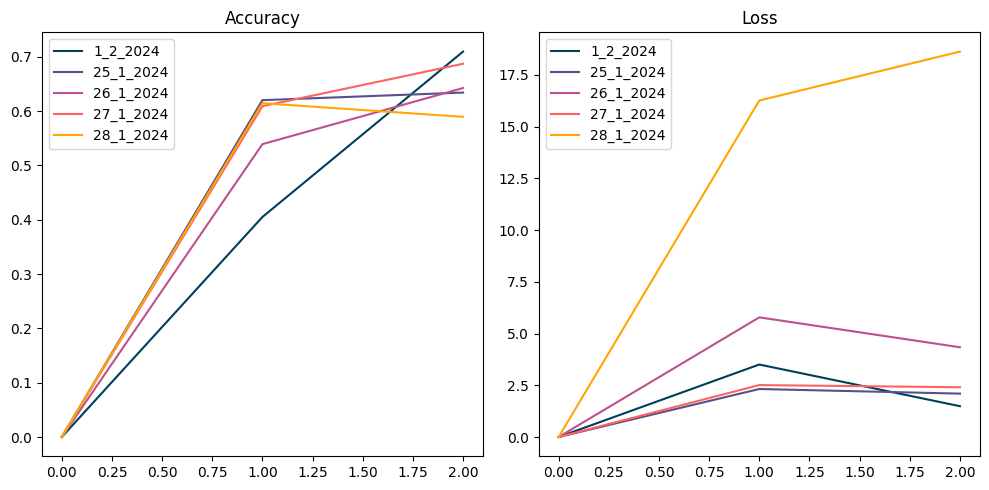

In [42]:
#plot the graph comparing the accuracy and loss of each model in the server_result folder
import matplotlib.pyplot as plt

#assign difference color for each bar
colors=['#003f5c','#58508d','#bc5090','#ff6361','#ffa600','#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
plt.figure(figsize=(10,5))
#plot double bar charts for accuracy, loss
plt.subplot(1,2,1)
for i in range(len(results)):
    plt.plot(list(results[i]['aggregated_accuracy'].values()),color=colors[i],label=dir_names[i])
plt.title('Accuracy')
plt.legend()
plt.subplot(1,2,2)
for i in range(len(results)):
    plt.plot(list(results[i]['aggregated_loss'].values()),color=colors[i],label=dir_names[i])
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

<h3>Vẽ biểu đồ chỉ so sánh kết quả cuối cùng với accuracy, loss của các session khác nhau</h3>

In [43]:
#run though every folder under the sever result directory
#and read all the result.json file in each folder
import os
import json
results=[]
dir_names=[]
for (root,dirs,files) in os.walk('./server_result', topdown=True): 
    for dir in dirs:
        result_path=os.path.join(root,dir,'result.json')
        if os.path.exists(result_path):
            with open(result_path) as f:
                data = json.load(f)
                #take only aggregated_accuracy and aggregated_loss
                data={key: data[key] for key in ['aggregated_accuracy', 'aggregated_loss']}
                #take only the last value in each key of the json file
                data['aggregated_accuracy']=list(data['aggregated_accuracy'].values())[-1]
                data['aggregated_loss']=list(data['aggregated_loss'].values())[-1]
                results.append(data)
                dir_names.append(dir)
print(results)
print(dir_names)

[{'aggregated_accuracy': 0.7094971835613251, 'aggregated_loss': 1.4898490905761719}, {'aggregated_accuracy': 0.6340782344341278, 'aggregated_loss': 2.096631407737732}, {'aggregated_accuracy': 0.6424581110477448, 'aggregated_loss': 4.338316202163696}, {'aggregated_accuracy': 0.6871508359909058, 'aggregated_loss': 2.4055010080337524}, {'aggregated_accuracy': 0.5893854796886444, 'aggregated_loss': 18.626834869384766}]
['1_2_2024', '25_1_2024', '26_1_2024', '27_1_2024', '28_1_2024']


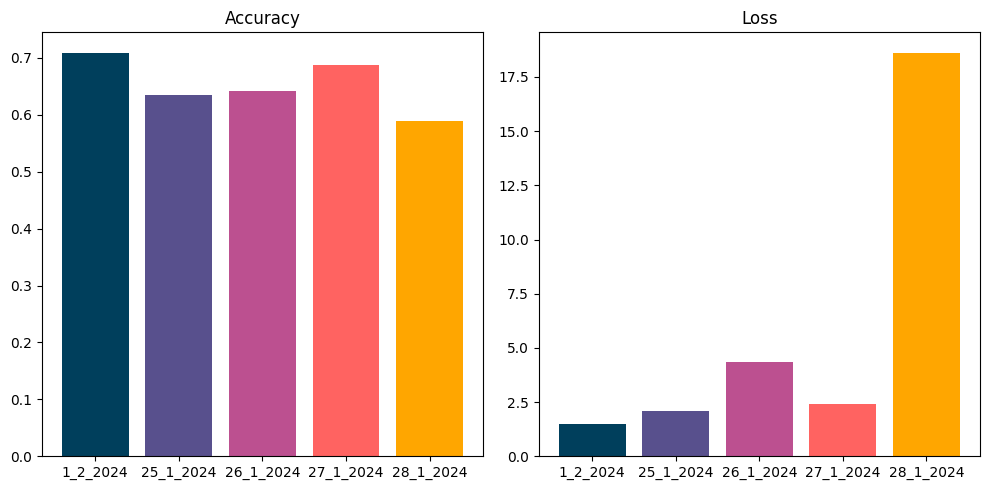

In [44]:
#plot the graph comparing the accuracy and loss of each model in the server_result folder
import matplotlib.pyplot as plt

#assign difference color for each bar
colors=['#003f5c','#58508d','#bc5090','#ff6361','#ffa600','#003f5c','#58508d','#bc5090','#ff6361','#ffa600']
plt.figure(figsize=(10,5))
#plot double bar charts for accuracy, loss
plt.subplot(1,2,1)
plt.bar(dir_names,[result['aggregated_accuracy'] for result in results],color=colors)
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.bar(dir_names,[result['aggregated_loss'] for result in results],color=colors)
plt.title('Loss')
plt.tight_layout()
plt.show()